In [207]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import csv
import json
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import gcsfs
from matplotlib import pyplot as plt

class Data:
  def __init__(self):
    self
    '''f = open('pc_data/Data_constructor.txt', 'r')
    content = f.read()
    print(content)
    f.close()'''
    
  def analysis(self, task_id):
     coco,dictionary_coco=self.load_annotation(task_id)
     final_category_count_list=self.get_categories_counts(coco,dictionary_coco)
     print(self.write_analysis_csv(final_category_count_list))    
     return  
    
  def visualize(self,task_id,tile_id):
      coco,dictionary_annotaion=self.load_annotation(task_id)
      annotation_id=coco.getAnnIds(imgIds=[tile_id])
      annotation=coco.loadAnns(annotation_id)
      image_coco=coco.loadImgs(tile_id)
      image_name=image_coco[0]['file_name']
      #remove comments when using with gcs bucket
        #medanta_images/Tasks/Task_102_readscan_309im_18patient/BA_13842.png
      #img_path="/content/Tasks_Task_"+task_id+"_readscan_309im_18patient_"+img_name
    #gs://medanta_images/Tasks/Task_102_readscan_309im_18patient/BNE_21041.png
      image=self.get_image(task_id,image_name)
      self.show_image_annotation(image,annotation,coco)
      return 
 
  def get_categories_counts(self,coco,dictionary_coco):
    annotation_dictionary=dictionary_coco['annotations']
    category_ids=list()
    for ann in annotation_dictionary:
        category_ids.append(ann['category_id'])
      
    category_id_unique, category_count = np.unique(category_ids, return_counts=True)
    
    categories=coco.loadCats(category_id_unique)
    categories_name=list()
    for cat in categories:
      categories_name.append(cat['name'])
    categories_name=[categories_name]
    counts=category_count.tolist()
    counts=[counts]
    final_category_count_list=np.concatenate((categories_name,counts),axis=0)
    return final_category_count_list
    
  def write_analysis_csv(self,final_list):
    file = open('Data_analysis.csv', 'w+', newline ='')
    fields=[['Category_name','count']] 
    # writing the data into the file
    with file:
        write = csv.writer(file)
        write.writerows(fields)
        write.writerows(np.transpose(final_list))
    return(pd.read_csv('Data_analysis.csv'))
       
  def get_annotation_path(self,task_id):
    task_id=str(task_id)
    bucket_name="tfrecords_and_logs/coco_instances_for_tasks/"
    task_json_file_name="task_"+task_id+"_instances_default.json"
    annotation_path="gs://"+bucket_name+task_json_file_name
    #ann_path="/content/coco_instances_for_tasks_task_"+task_id+"_instances_default.json"
    return annotation_path

  def load_annotation(self,task_id):
    annotation_path=self.get_annotation_path(task_id)
    with fs.open(annotation_path) as json_file:
     dictionary_coco = json.load(json_file)
    annotation_storage="temporary_annotation_file.json"
    with open(annotation_storage, "w") as outfile:
     json.dump(dictionary_coco, outfile)
    coco=COCO(annotation_storage)
    return coco,dictionary_coco
  
  def get_image(self,task_id,image_name):
     bucket_name="medanta_images/Tasks/"
     fs = gcsfs.GCSFileSystem(project='qp-medanta-2020-05')
     tasks_folder_list=fs.ls("gs://"+bucket_name)
     for image_path in tasks_folder_list:
        if image_path.startswith(("Task_"+str(task_id)),21):
          break
     image_path_gs="gs://"+image_path+"/"+image_name
     print(image_path_gs)
     with fs.open(image_path_gs) as f:
        image = io.imread(f) 
     return image

  def show_image_annotation(self,image,annotation,coco):
     fig = plt.figure(figsize=(10, 7))
     fig.add_subplot(1,2,1)
     plt.imshow(image)
     fig.add_subplot(1,2,2)
     plt.imshow(image)
     coco.showAnns(annotation, draw_bbox=False)
         
    
        

In [208]:
data=Data()

In [198]:
data.analysis(25)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
                                       Category_name  count
0                           Nucleated red blood cell      1
1                               Giant platelet (ITP)      3
2                                         Neutrophil    192
3                          Hypersegmented neutrophil     19
4   Hypolobated neutrophil (Pelger Huet abnormality)      1
5                  Neutrophil with toxic granulation     23
6                Band form (left shifted neutrophil)      8
7                                  Normal Lymphocyte     27
8                          Large granular lymphocyte     18
9                                          Myelocyte      4
10                                        Eosinophil      1
11                                    Platelet clump     10
12                                   Degenerate cell      1


In [199]:
data.analysis(102)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
                         Category_name  count
0             Nucleated red blood cell      5
1                       Large platelet      9
2                           Neutrophil      6
3  Band form (left shifted neutrophil)      5
4                        Metamyelocyte     11
5                            Myelocyte     35
6                           Eosinophil    136
7                             Basophil     49
8                             Monoctye     17
9                       Platelet clump     43


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
gs://medanta_images/Tasks/Task_102_readscan_309im_18patient/BNE_21041.png


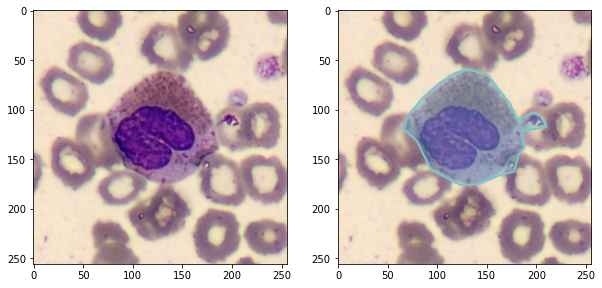

In [209]:
data.visualize(102,44)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
gs://medanta_images/Tasks/Task_102_readscan_309im_18patient/BA_20847.png


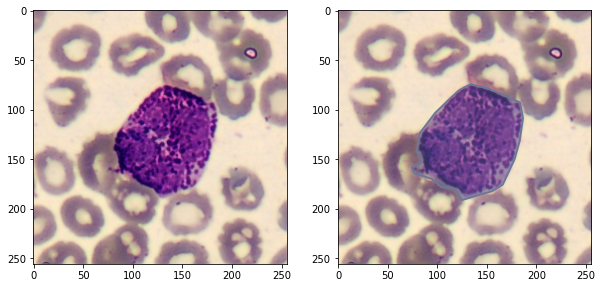

In [201]:
data.visualize(102,9)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
gs://medanta_images/Tasks/Task_126_readscan_213im_2patient_Blasts/BL_41811.png


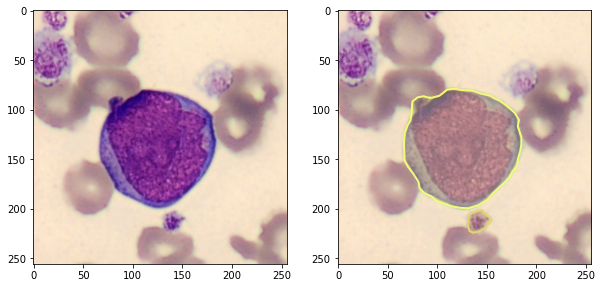

In [210]:
data.visualize(126,17)